# Chapter 13: Understanding Quantum Utility and Qiskit Patterns
This Jupyter notebook has been created from the book "Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python", by Robert Loredo, Second Edition, Packt, Feb 25, 2025. 

It has been updated to work with Python 3.12 and the following Qiskit versions:
* Qiskit v1.3, Qiskit runtime version: 0.34
* Qiskit v 2.0, Qiskit runtime version: 0.37
|||
|-|-|
|**Author:** |Robert Loredo|
|**Reviewer:** |Alain Chancé|
|**Date:** |April 12, 2025|
|**Version:** |**1.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Robert Loredo, Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python, Second Edition, Packt, Feb 25, 2025](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-9781803240923)
[Chapter 13: Understanding Quantum Utility and Qiskit Patterns](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-second-edition-9781803244808/chapter/understanding-quantum-utility-and-qiskit-patterns-13/section/understanding-quantum-utility-and-qiskit-patterns-ch13lvl1sec98)
[Packt's code repository for the book](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition)
[LICENSE](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/LICENSE)
[Migrate to the Qiskit Runtime V2 primitives](https://docs.quantum.ibm.com/migration-guides/v2-primitives)
[Phase Oracle](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseOracle)
[tweedledum](https://github.com/boschmitt/tweedledum)
[conda-forgetweedledum-feedstock](https://github.com/conda-forge/tweedledum-feedstock)
[Qiskit Algorithms (qiskit_algorithms)](https://qiskit-community.github.io/qiskit-algorithms/apidocs/qiskit_algorithms.html)
[Grover’s Algorithm and Amplitude Amplification](https://qiskit-community.github.io/qiskit-algorithms/tutorials/06_grover.html)
[Grover Operator](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.GroverOperator)
[grover_operator](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.grover_operator)
<br/>

In [1]:
# Load Helper file
%run helper_file_1.0.ipynb

Token read from file:  Token.txt
Qiskit version: 2.0.0
Qiskit runtime version: 0.37.0
/home/alain/miniconda3/bin/python
Python 3.12.9


In [2]:
!pip list | grep qiskit

qiskit                                   2.0.0
qiskit-aer                               0.17.0
qiskit-algorithms                        0.3.1
qiskit-dynamics                          0.5.1
qiskit-ibm-catalog                       0.5.0
qiskit-ibm-runtime                       0.37.0
qiskit-nature                            0.7.2
qiskit-serverless                        0.21.1
qiskit_utils                             1.2.1


# Implementing the Logical Expression Oracle

In [3]:
# Import the necessary modules and classes
from qiskit import QuantumCircuit
from qiskit.visualization import *
import qiskit_aer
from qiskit_aer import AerSimulator
from qiskit.circuit.library import grover_operator

# Added by Alain Chancé
from qiskit.quantum_info import Statevector

# Modified by Alain Chancé
#from qiskit_algorithms import Grover, AmplificationProblem
try:
    from qiskit_algorithms import Grover, AmplificationProblem
    AmplificationProblem_Installed = True
except:
    print(sys.exc_info())
    AmplificationProblem_Installed = False

from qiskit.circuit.library.phase_oracle import PhaseOracle
# State the SAT problem into a logical expression
# A = Ivana, B = Karla, C = Leo, D = Lex
expression = '((A ^ B) & (C & D) & ~(A & C))'

(<class 'ImportError'>, ImportError("cannot import name '_circuit_key' from 'qiskit.primitives.utils' (/home/alain/miniconda3/lib/python3.12/site-packages/qiskit/primitives/utils.py)"), <traceback object at 0x7f938c7a88c0>)


### The 'tweedledum' library is required to use 'PhaseOracle'.

tweedledum is a library for synthesis, compilation, and optimization of quantum circuits. The library is written to be scalable up to problem sizes in which quantum circuits outperform classical ones. Also, it is meant to be used both independently and alongside established tools. https://github.com/boschmitt/tweedledum

### Installing tweedledum
https://github.com/conda-forge/tweedledum-feedstock#installing-tweedledum

```
conda config --add channels conda-forge
conda config --set channel_priority strict

conda install tweedledum
```

In [4]:
# The 'tweedledum' library is required to use 'PhaseOracle'.
# Create a PhaseOracle based on the logical expression
try:
    oracle = PhaseOracle(expression)
    tweedledum_installed = True
    print("tweedledum installed")
except:
    print(sys.exc_info())
    tweedledum_installed = False

tweedledum installed


In [5]:
if tweedledum_installed and AmplificationProblem_Installed:
    problem = AmplificationProblem(oracle,
    is_good_state=oracle.evaluate_bitstring)
    oracle = problem.grover_operator.oracle
else:
    good_state = '1110'
    
    # Create a quantum circuit with 4 qubits
    oracle = QuantumCircuit(4)

    # Apply a multi-controlled X gate with an open control on q0
    oracle.mcx([1, 2, 3], 0, ctrl_state='000')

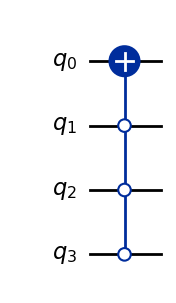

In [6]:
# Draw the circuit
oracle.draw(output='mpl')

Figure 13.1: Quantum circuit representing the Logical Expression Oracle

### Construct the Grover operator

In [7]:
# Construct the Grover operator.
# grover_operator
# https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.grover_operator
oracle = Statevector.from_label(good_state)
grover_op = grover_operator(oracle)

### Construct the Grover operator circuit

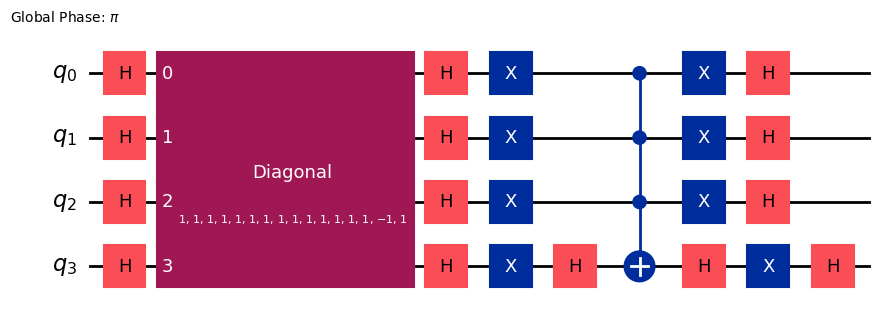

In [8]:
# Construct the Grover operator circuit
grover_qc = QuantumCircuit(4)
grover_qc.h(range(4))
grover_qc = grover_qc.compose(grover_op)
grover_qc.draw(output="mpl", style="iqp")

In [9]:
results = Statevector.from_instruction(grover_qc).probabilities_dict()

### Plot the quasi-distribution

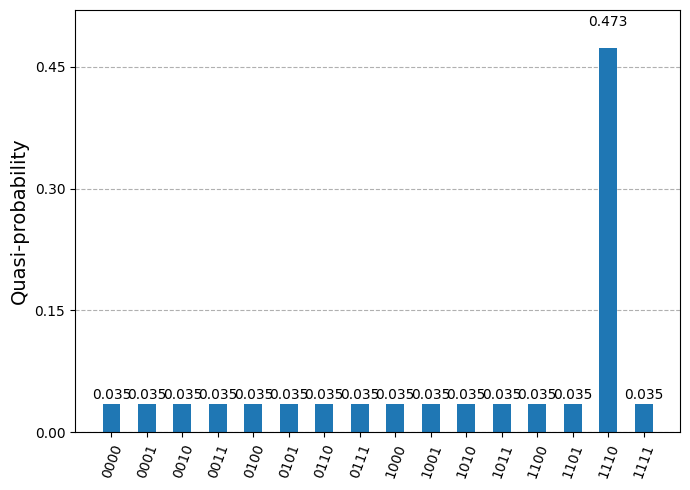

In [10]:
plot_distribution(results)

Figure 13.2: Grover solution results based on the Logical Expression Oracle

## Print Qiskit version

In [11]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.0.0


## Print Qiskit runtime version

In [12]:
import qiskit_ibm_runtime
print(f"Qiskit runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit runtime version: 0.37.0


## Show Python version

In [13]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.12.9
